Wine, Breast cancer, BMI 20000 데이터를 SVM 분류로 학습한다

# Support Vector Machine

**SVM**(Support Vector Machine)은 개체를 분류하는 중요한 기술이다. SVM의 모습은 2차원 또는 3차원 공간에 각각의 개체가 위치하고, 선을 그어 분류하기 위해 선을 구성하는 매개변수를 조정해 이를 기반으로 패턴을 인식한다.

<img src='https://i.imgur.com/E7HrgBu.jpeg' width=600>


## SVM이란?


SVM은 일반적으로 분류 문제에서 사용됩니다. 서로 반대되는 두 클래스의 가장 가까운 데이터 포인트 사이의 마진을 최대화하는 최적의 초평면을 찾아 두 클래스를 구분합니다. 

아래 그래프에서 두 종류 데이터를 구분하는 구분선을 그을 때, 여러가지 구분선이 나올 수 있는데 가장 중간이 적당할 것이다. 이 중간을 지나는 선을 결정할 때 오른쪽 그래프 같이 중간과 가까운 선의 거리(마진)을 최대로 만드는 것이 가장 좋다.

<img src='https://velog.velcdn.com/images/shlee0125/post/491447d4-c07b-416d-a27d-b79a240b7746/image.png' width=500>

이것이 svm의 특징인 마진 최대화라고 한다. 이런 svm 특징을 이용하면 알 수 없는 패턴도 제대로 분류할 확률이 괭장히 높다고 한다. 이를 학습 이론에서 **일반환 능력** 이라고 한다.

In [1]:
import pandas as pd
import numpy as np
from ipykernel.kernelapp import kernel_aliases
from sklearn.datasets import load_wine

Text(0.5, 1.0, '한글 타이틀...')

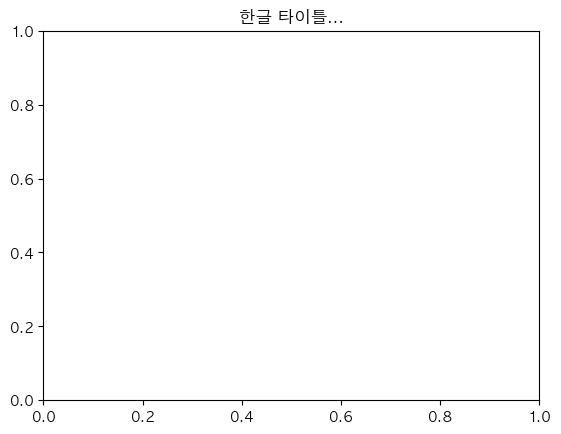

In [2]:
import matplotlib.pyplot as plt
# import matplotlib.pylab as plt
import matplotlib.font_manager as fm
%matplotlib inline

# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'  # Mac (AppleGothic 또는 AppleSDGothicNeo)
# plt.rcParams['font.family'] = 'NanumGothic' # Linux (NanumGothic 또는 다른 설치된 한글 폰트)

plt.rcParams['axes.unicode_minus'] = False #glypy 8722: Axes에 - 표시 안되는 것
plt.title('한글 타이틀...')

# 1. 와인데이터 학습하기

In [3]:
# scikit 의 load_wine

wine = load_wine()

In [4]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [5]:
# wine 데이터의 feature, target로 Dataframe을 만든다.
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)

# feature 만 있는 데이터 프레임에 타겟 데이터를 추가한다.
df_wine['target'] = wine.target

df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
# target에 class 이름 매핑
labels = [wine['target_names'][i] for i in wine.target]
labels

['class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_0',
 'class_1',
 'class_1',
 'class_1',
 'class_1',
 'class_1',
 'class_1',
 'class_1',
 'class_1',
 'class_1',
 'class_1',
 'class_1',
 'class_1',
 'class_1',
 'class_1',
 'class_1',
 'class_1',
 'class_1',
 'class_1',
 'class_1',
 'class_1',
 'class_1',
 'class_1',
 'class_1',
 'class_1',
 'cl

In [7]:
# class 필드
df_wine['class'] = labels
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [8]:
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [9]:
# class 별 개수
df_wine['class'].value_counts()

class
class_1    71
class_0    59
class_2    48
Name: count, dtype: int64

In [10]:
# 데이터세트에서 훈련데이터와 타겟데이터 분리
X = df_wine.drop(['target','class'], axis=1)
y = df_wine['target']

In [11]:
X.shape, y.shape

((178, 13), (178,))

In [12]:
# 학습 데이터 분리 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=50)

In [13]:
X_train.shape, y_train.shape

((119, 13), (119,))

SVM(Support Vector Machine) 알고리즘으로 학습 수행후 정확도를 확인한다.

In [14]:
# svm 모듈
from sklearn import svm

# SVC 학습
svc = svm.SVC()
svc.fit(X_train, y_train)

SVC()

In [15]:
# X_test 예측
svc.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# X_test 의 평가 점수 Result
pred = svc.predict(X_test)
ac_score_test = svc.score(X_test, y_test)
ac_score_train = svc.score(X_train, y_train)
cl_report = classification_report(y_test, pred)

print("정답률_테스트: ", ac_score_test)
print("정답률_학습: ", ac_score_train)

print("R2: ", r2_score(y_test, svc.predict(X_test)))
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))

print("리포트 = \n", cl_report)

정답률_테스트:  0.6440677966101694
정답률_학습:  0.6890756302521008
R2:  0.36330935251798546
MAE:  0.3559322033898305
MSE:  0.3559322033898305
RMSE:  0.5966005392134929
리포트 = 
               precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.56      0.96      0.70        26
           2       0.00      0.00      0.00        17

    accuracy                           0.64        59
   macro avg       0.49      0.59      0.52        59
weighted avg       0.50      0.64      0.55        59



/Users/ihanjo/Library/Python/3.13/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ihanjo/Library/Python/3.13/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ihanjo/Library/Python/3.13/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

### 정규화 후 학습

스케일러 처리한 데이터로 처리.

In [17]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [18]:
# 훈련 데이터, 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.33, random_state=50)

In [19]:
# 학습 데이터
svc = svm.SVC()
svc.fit(X_train, y_train)

SVC()

In [20]:
# 예측
pred = svc.predict(X_test)
ac_score_test = svc.score(X_test, y_test)
ac_score_train = svc.score(X_train, y_train)
cl_report = classification_report(y_test, pred)

# Result
print("정답률_테스트: ", ac_score_test)
print("정답률_학습: ", ac_score_train)

print("R2: ", r2_score(y_test, pred))
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))

print("리포트 = \n", cl_report)

정답률_테스트:  0.9830508474576272
정답률_학습:  1.0
R2:  0.9696813977389517
MAE:  0.01694915254237288
MSE:  0.01694915254237288
RMSE:  0.13018891098082386
리포트 = 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.96      1.00      0.98        26
           2       1.00      1.00      1.00        17

    accuracy                           0.98        59
   macro avg       0.99      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59



# 2. BMI 학습하기

이전 학습에서 생성한 BMI 지표 가상 데이터 20000개를 학습해 보자

In [21]:
# 키,몸무데,bmi 데이터
tbl = pd.read_csv('./data/bmi20000.csv')
tbl.head()

,height,weight,label
0,125,43,normal
1,121,60,normal
2,183,57,thin
3,135,78,normal
4,162,37,thin


In [22]:
# 학습 데이터와 라벨
bmi_data = tbl.drop('label', axis=1)
labels = tbl['label']

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

labels = encoder.fit_transform(labels)
labels.shape

(20000,)

In [24]:
%%time

# 학습 데이터와 테스트 데이터로 나누기
bmi_train, bmi_test, y_train, y_test = train_test_split(bmi_data, labels, test_size=0.33, random_state=50)

# 학습하기
clf = svm.SVC()
clf.fit(bmi_train, y_train)

CPU times: user 167 ms, sys: 7.81 ms, total: 175 ms
Wall time: 174 ms


SVC()

In [25]:
clf.predict(bmi_test[:10])

array([0, 0, 1, 1, 1, 0, 2, 2, 1, 0])

In [26]:
# 예측하기
pred = clf.predict(bmi_test)
ac_score = clf.score(bmi_test, y_test)
cl_report = classification_report(y_test, pred)

#결과
print("정답률 =", ac_score)
#
print("R2: ", r2_score(y_test, pred))
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))

print("리포트=\n", cl_report)

정답률 = 0.9892424242424243
R2:  0.942803141185171
MAE:  0.018787878787878787
MSE:  0.03484848484848485
RMSE:  0.18667748886377503
리포트=
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1957
           1       1.00      0.99      1.00      2577
           2       0.99      0.98      0.99      2066

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



기계가 BMI를 모르는 상태에서도 약 99% 확률로 분류하고 있다.

### 표준화로 처리

In [27]:
# 표준화
scaler = StandardScaler()
bmi_std = scaler.fit_transform(bmi_data)
bmi_std

array([[-1.48734334, -1.10058971],
       [-1.65840385,  0.18147207],
       [ 0.99303406, -0.04477412],
       ...,
       [-1.35904796, -0.42185112],
       [ 1.16409457,  1.38811846],
       [ 0.39432227, -1.4022513 ]])

In [28]:
bmi_std.min(), bmi_std.max()

(-1.7039128975229787, 1.720041230650095)

In [29]:
%%time
# 훈련데이터, 테스트 데이터 분할
bmi_train, bmi_test, y_train, y_test = train_test_split(bmi_std, labels, test_size=0.33, random_state=50)

# 학습하기
clf = svm.SVC()
clf.fit(bmi_train, y_train)

CPU times: user 99.9 ms, sys: 1.7 ms, total: 102 ms
Wall time: 101 ms


SVC()

In [30]:
# 예측
pred = clf.predict(bmi_test)

In [31]:
from sklearn.metrics import accuracy_score, classification_report

# 예측하기
pred = clf.predict(bmi_test)
ac_score = clf.score(bmi_test, y_test)
cl_report = classification_report(y_test, pred)

#결과
print("정답률 =", ac_score)

print("R2: ", r2_score(y_test, pred))
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))

print("리포트=\n", cl_report)

정답률 = 0.9922727272727273
R2:  0.9574753788811488
MAE:  0.013787878787878788
MSE:  0.02590909090909091
RMSE:  0.16096301099659793
리포트=
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1957
           1       1.00      1.00      1.00      2577
           2       1.00      0.98      0.99      2066

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



In [32]:
# 정규화 전
# 정답률 = 0.9892424242424243     -> 1에 가까울 수록 좋음
# R2:  0.942803141185171        -> 1에 가까울 수록 좋음
# MAE:  0.018787878787878787    -> 0에 가까울 수록 좋음
# MSE:  0.03484848484848485     -> 0에 가까울 수록 좋음
# RMSE:  0.18667748886377503    -> 0에 가까울 수록 좋음

# 정규화 후
# 정답률 = 0.9922727272727273
# R2:  0.9574753788811488
# MAE:  0.013787878787878788
# MSE:  0.02590909090909091
# RMSE:  0.16096301099659793

R2:  0.942803141185171
MAE:  0.018787878787878787
MSE:  0.03484848484848485
RMSE:  0.18667748886377503### Max 값 정규화

데이터 정규화를 위해 기준 값으로 하기도 한다.
 - 몸무게 100kg
 - 키 200cm

In [34]:
#칼럼 자르고 정규화 하기
W = tbl['weight'] / 100 # 최고 100kg 제한
H = tbl['height'] / 200 # 최고 200cm 제한
W[:3], H[:3]

(0    0.43
 1    0.60
 2    0.57
 Name: weight, dtype: float64,
 0    0.625
 1    0.605
 2    0.915
 Name: height, dtype: float64)

In [35]:
X = pd.concat([W, H], axis=1)
X[:3]

,weight,height
0,0.43,0.625
1,0.60,0.605
2,0.57,0.915


In [ ]:
#최대 100kg 이라고 가정

#최고 200cm 라고 가정


# 3. SVM의 종류

scikit-learn 은 세 가지 종류의 SVM을 지원한다. **SVC, NuSVC, LinearSVC** 이다. 

SVC, NuSVC는 표준적으로 구현한 SVM이다. 오류 처리 방법이 약간 다르지만 수학적으로 같다. LinearSVC 는 선형 커널 특화된 SVM으로 계산이 빠르며 다양한 옵션을 가지고 있다.

앞서 bmi 코드에서 LinearSVC 로 구현해보면, 정답률은 조금 떨어지지만 실행 시간이 뚝 떨어지는 것을 알 수 있다.

In [36]:
%%time

# 학습 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.33, random_state=50)

# 학습하기
clf = svm.LinearSVC()
clf.fit(X_train, y_train)

#예측하기
pred = clf.predict(X_test)

#결과
print("정답률 =", accuracy_score(y_test, pred))
print("리포트=\n", classification_report(y_test, pred))

정답률 = 0.9163636363636364
리포트=
               precision    recall  f1-score   support

           0       1.00      0.72      0.84      1957
           1       0.90      1.00      0.95      2577
           2       0.89      1.00      0.94      2066

    accuracy                           0.92      6600
   macro avg       0.93      0.91      0.91      6600
weighted avg       0.93      0.92      0.91      6600

CPU times: user 13 ms, sys: 1.84 ms, total: 14.8 ms
Wall time: 15 ms


/Users/ihanjo/Library/Python/3.13/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/ihanjo/Library/Python/3.13/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ihanjo/Library/Python/3.13/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


# 4. 암 데이터 학습하기

In [39]:
# scikit 의 load_breast_cancer 사용
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [40]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [42]:
df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df_cancer['target'] = cancer.target

In [49]:
# 데이터 확인
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [48]:
# class 에 target_name 할당
labels = [cancer['target_names'][i] for i in cancer.target]
df_cancer['class'] = labels
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [50]:
# class 와 target 의 항목
print(df_cancer['class'].value_counts())
print(df_cancer['target'].value_counts())

class
benign       357
malignant    212
Name: count, dtype: int64
target
1    357
0    212
Name: count, dtype: int64


EDA를 위한 준비

In [53]:
# 학습 데이터, 라벨 분할
X = df_cancer.drop(['target','class'], axis = 1)
y = df_cancer['target']

#### 학습

In [54]:
# 훈련데이터, 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=50)

In [66]:
%%time
# 학습하기
clf_svm = svm.SVC(kernel = 'rbf') # 기본값 - rbf, 커널 변경 -> linear
clf_svm.fit(X_train, y_train)

CPU times: user 2.27 ms, sys: 1.05 ms, total: 3.32 ms
Wall time: 2.22 ms


SVC()

In [67]:
# X_test 예측
pred = clf_svm.predict(X_test)

In [68]:
ac_score = clf_svm.score(X_test, y_test)
cl_report = classification_report(y_test, pred)

print("정답률 =", ac_score)

print("R2: ", r2_score(y_test, pred))
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))

print("리포트=\n", cl_report)

정답률 = 0.9361702127659575
R2:  0.7217219686690515
MAE:  0.06382978723404255
MSE:  0.06382978723404255
RMSE:  0.25264557631995566
리포트=
               precision    recall  f1-score   support

           0       0.98      0.84      0.90        67
           1       0.92      0.99      0.95       121

    accuracy                           0.94       188
   macro avg       0.95      0.91      0.93       188
weighted avg       0.94      0.94      0.93       188



In [ ]:
# 커널 rbf
# 정답률 = 0.9361702127659575
# R2:  0.7217219686690515
# MAE:  0.06382978723404255
# MSE:  0.06382978723404255
# RMSE:  0.25264557631995566
#
# 커널 linear
# 정답률 = 0.9680851063829787
# R2:  0.8608609843345257
# MAE:  0.031914893617021274
# MSE:  0.031914893617021274
# RMSE:  0.1786474002526241

#### 정규화 후 학습

In [72]:
# StandardScaler 사용 정규화 진행
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [73]:
# 훈련데이터, 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.33, random_state=50)

In [81]:
%%time
# 학습하기
clf_svm = svm.SVC()
clf_svm.fit(X_train, y_train)

CPU times: user 1.57 ms, sys: 767 μs, total: 2.34 ms
Wall time: 1.55 ms


SVC()

In [82]:
# X_test 예측
pred = clf_svm.predict(X_test)

In [83]:
ac_score = clf_svm.score(X_test, y_test)
cl_report = classification_report(y_test, pred)

print("정답률 =", ac_score)

print("R2: ", r2_score(y_test, pred))
print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))

print("리포트=\n", cl_report)

정답률 = 0.9680851063829787
R2:  0.8608609843345257
MAE:  0.031914893617021274
MSE:  0.031914893617021274
RMSE:  0.1786474002526241
리포트=
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        67
           1       0.98      0.98      0.98       121

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



In [84]:
# 정규화 전
# 정답률 = 0.9361702127659575
# R2:  0.7217219686690515
# MAE:  0.06382978723404255
# MSE:  0.06382978723404255
# RMSE:  0.25264557631995566

# 정규화 후
# 정답률 = 0.9680851063829787
# R2:  0.8608609843345257
# MAE:  0.031914893617021274
# MSE:  0.031914893617021274
# RMSE:  0.1786474002526241

# 정규화 후(kernel = linear)
# 정답률 = 0.973404255319149
# R2:  0.8840508202787715
# MAE:  0.026595744680851064
# MSE:  0.026595744680851064
# RMSE:  0.16308201826336055

# "실습" 

와인 데이터와 암 데이터를 DecisionTree 로 분류해보자

In [ ]:
df_wine.head()

In [ ]:
df_cancer.head()